In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [2]:
plt.rcParams['figure.figsize']= (10, 7)

[PosixPath('sgemm_performance/precision_sgemm_performance.csv'), PosixPath('bike_share/precision_bike_share.csv'), PosixPath('drugs_review/precision_drug_reviews.csv'), PosixPath('covtype/precision_covtype.csv'), PosixPath('nursery/precision_nursery.csv'), PosixPath('adult/precision_adult.csv')]
PRECISION_SGEMM_PERFORMANCE


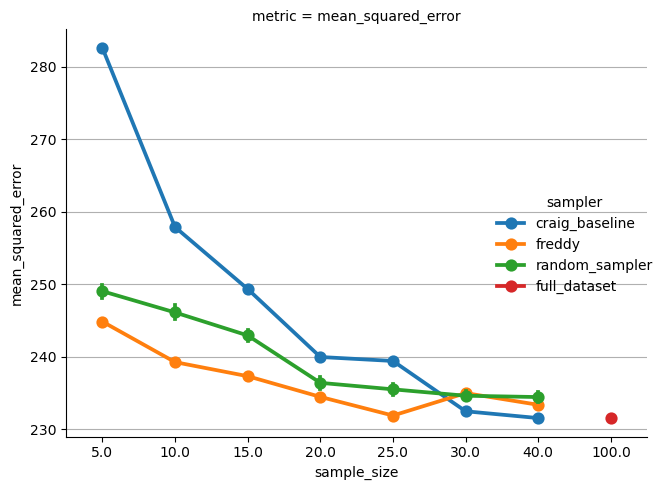

In [3]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]

print(files)

print(f'{files[0].stem.upper()}')


result = pd.read_csv(files[0])
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
result.value = result.value ** .5
# sns.barplot(data=result[result.sample_size>4], x='sample_size', y='value', hue='sampler')
# sns.barplot(data=result, x='sample_size', y='value', hue='sampler')
sns.catplot(data=result, x='sample_size', y='value', hue='sampler', kind='point', col='metric', errorbar='sd')
# plt.title(f'{files[1].stem.upper()} dataset', fontsize=10)
plt.ylabel(result.metric.unique()[0])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

[PosixPath('sgemm_performance/precision_sgemm_performance.csv'), PosixPath('bike_share/precision_bike_share.csv'), PosixPath('drugs_review/precision_drug_reviews.csv'), PosixPath('covtype/precision_covtype.csv'), PosixPath('nursery/precision_nursery.csv'), PosixPath('adult/precision_adult.csv')]
PRECISION_BIKE_SHARE


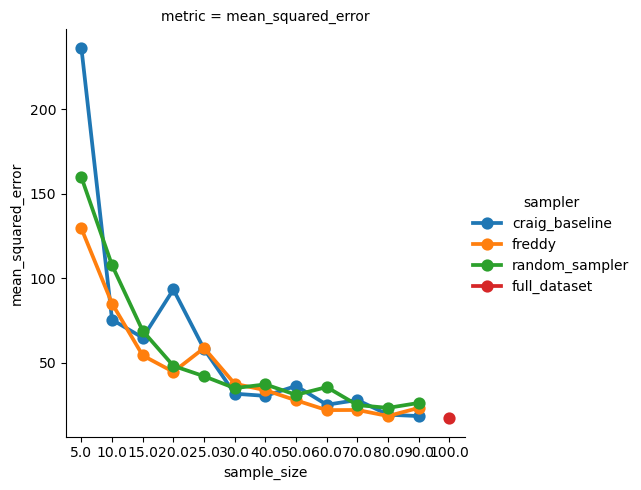

In [18]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]

print(files)

print(f'{files[1].stem.upper()}')


result = pd.read_csv(files[1])
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
# result.value = result.value ** .5
sns.catplot(data=result[result.sample_size>1], x='sample_size', y='value', hue='sampler', kind='point', col='metric')
# sns.pointplot(data=result, x='sample_size', y='value', hue='sampler', errorbar=("sd", 1))
# plt.title(f'{files[1].stem.upper()} dataset', fontsize=10)
plt.ylabel(result.metric.unique()[0])
# plt.tight_layout()
plt.show()

[PosixPath('sgemm_performance/precision_sgemm_performance.csv'), PosixPath('bike_share/precision_bike_share.csv'), PosixPath('drugs_review/precision_drug_reviews.csv'), PosixPath('covtype/precision_covtype.csv'), PosixPath('nursery/precision_nursery.csv'), PosixPath('adult/precision_adult.csv')]
PRECISION_DRUG_REVIEWS


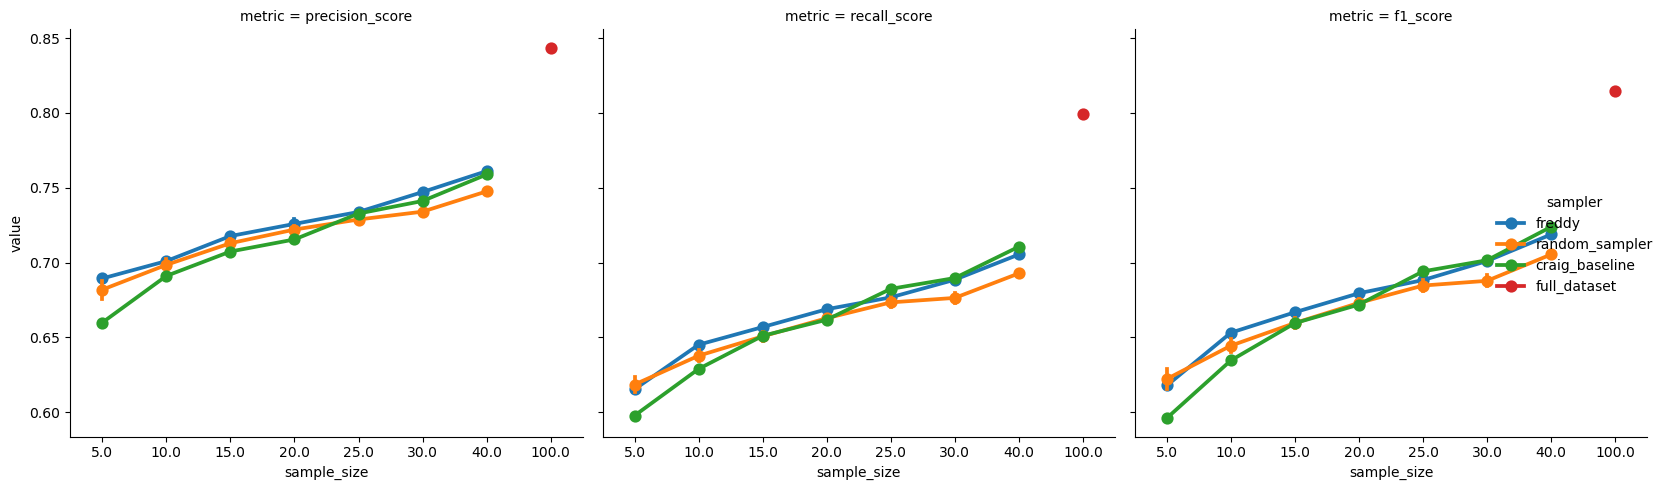

In [5]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]

print(files)

print(f'{files[2].stem.upper()}')


result = pd.read_csv(files[2])
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
# sns.catplot(data=result[result.sample_size>4], x='sample_size', y='value', hue='sampler', kind='point', col='metric')
sns.catplot(data=result, x='sample_size', y='value', hue='sampler', kind='point', col='metric', errorbar='sd')
plt.ylabel(result.metric.unique()[0])
plt.tight_layout()
plt.show()

[PosixPath('sgemm_performance/precision_sgemm_performance.csv'), PosixPath('bike_share/precision_bike_share.csv'), PosixPath('drugs_review/precision_drug_reviews.csv'), PosixPath('covtype/precision_covtype.csv'), PosixPath('nursery/precision_nursery.csv'), PosixPath('adult/precision_adult.csv')]
PRECISION_COVTYPE


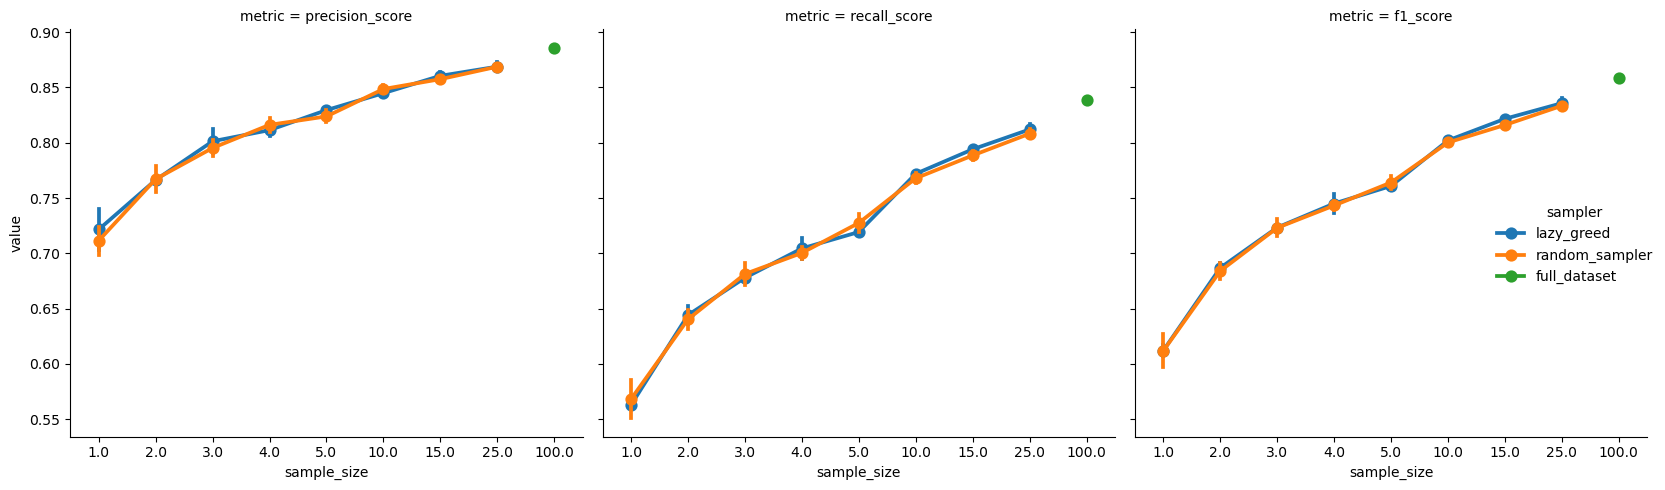

In [6]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]

print(files)

print(f'{files[3].stem.upper()}')


result = pd.read_csv(files[3])
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
# sns.catplot(data=result[result.sample_size>4], x='sample_size', y='value', hue='sampler', kind='box', col='metric')
sns.catplot(data=result, x='sample_size', y='value', hue='sampler', kind='point', col='metric', errorbar='sd')
# sns.catplot(data=result, x='sample_size', y='value', hue='sampler', kind='box', col='metric')
plt.ylabel(result.metric.unique()[0])
plt.tight_layout()
plt.show()

[PosixPath('sgemm_performance/precision_sgemm_performance.csv'), PosixPath('bike_share/precision_bike_share.csv'), PosixPath('drugs_review/precision_drug_reviews.csv'), PosixPath('covtype/precision_covtype.csv'), PosixPath('nursery/precision_nursery.csv'), PosixPath('adult/precision_adult.csv')]
PRECISION_NURSERY


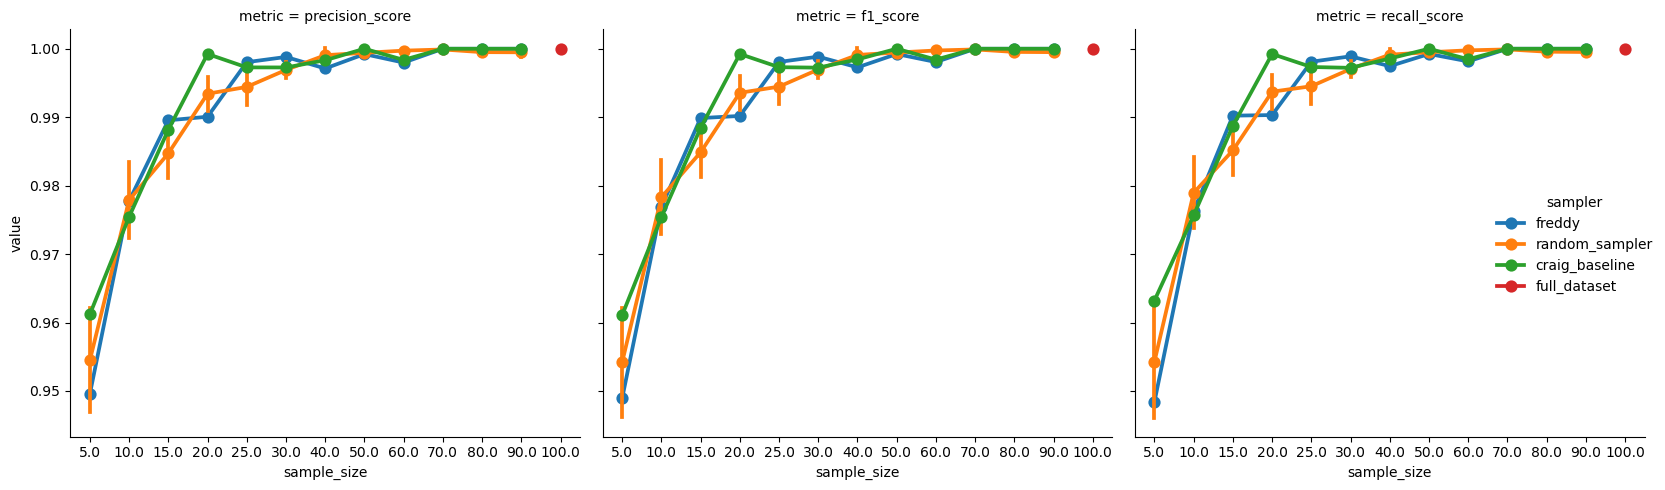

In [7]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]

print(files)

print(f'{files[4].stem.upper()}')


result = pd.read_csv(files[4])
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
sns.catplot(data=result[result.sample_size>1], x='sample_size', y='value', hue='sampler', kind='point', col='metric', errorbar='sd')
# sns.catplot(data=result, x='sample_size', y='value', hue='sampler', kind='point', col='metric', errorbar='sd')
# sns.lineplot(data=result, x='sample_size', y='value', hue='sampler')
plt.ylabel(result.metric.unique()[0])
# plt.ylim([.5, 1])
plt.tight_layout()
plt.show()

[PosixPath('sgemm_performance/precision_sgemm_performance.csv'), PosixPath('bike_share/precision_bike_share.csv'), PosixPath('drugs_review/precision_drug_reviews.csv'), PosixPath('covtype/precision_covtype.csv'), PosixPath('nursery/precision_nursery.csv'), PosixPath('adult/precision_adult.csv')]
PRECISION_ADULT


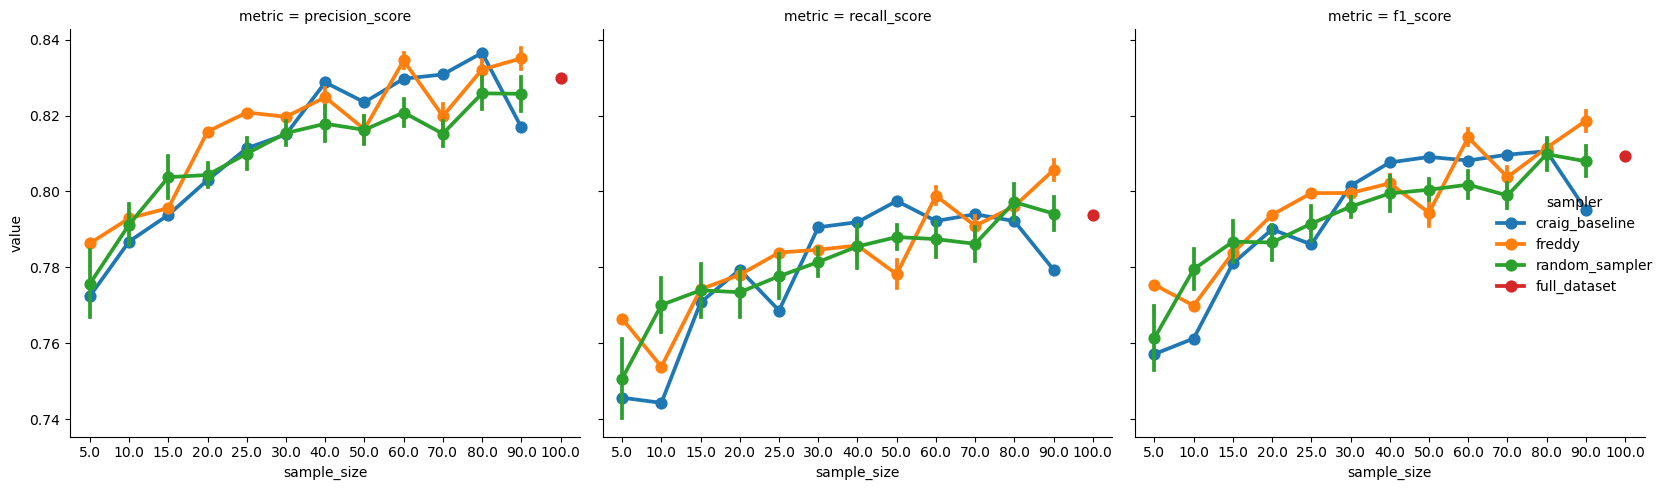

In [8]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]

print(files)

print(f'{files[5].stem.upper()}')


result = pd.read_csv(files[5])
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
sns.catplot(data=result[result.sample_size>1], x='sample_size', y='value', hue='sampler', kind='point', col='metric', errorbar='sd')
# sns.catplot(data=result, x='sample_size', y='value', hue='sampler', kind='point', col='metric', errorbar='sd')
plt.ylabel(result.metric.unique()[0])
plt.tight_layout()
plt.show()

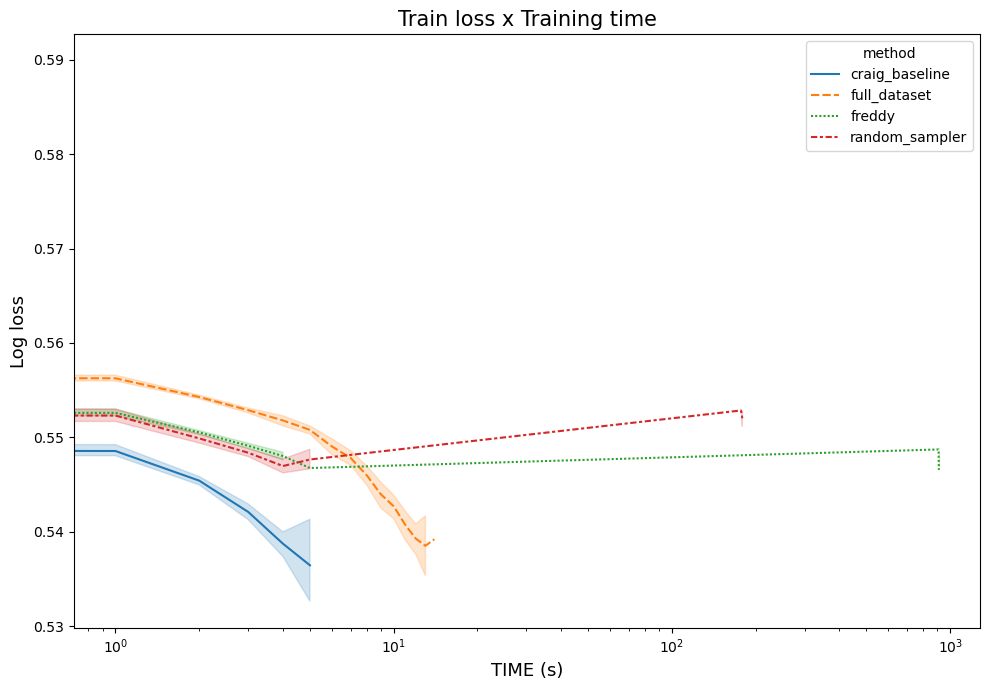

In [9]:
result = pd.read_csv('/Users/victor/Documents/projects/coreset/results/drugs_review/curve_drug_reviews.csv')
result['elapsed'] = result['elapsed'].astype(int)

sns.lineplot(result, x='elapsed', y='hist', hue='method', style='method')
plt.title('Train loss x Training time', fontsize=15)
plt.xlabel('TIME (s)', fontsize=13)
plt.xscale('log')
plt.ylabel('Log loss', fontsize=13)
plt.tight_layout()
plt.show()

In [10]:
result

,hist,elapsed,method
0,0.614149,0,craig_baseline
1,0.560973,0,craig_baseline
2,0.551715,0,craig_baseline
3,0.549485,1,craig_baseline
4,0.547501,1,craig_baseline
...,...,...,...
895,0.550082,2,random_sampler
896,0.548447,3,random_sampler
897,0.548600,3,random_sampler
898,0.547902,3,random_sampler


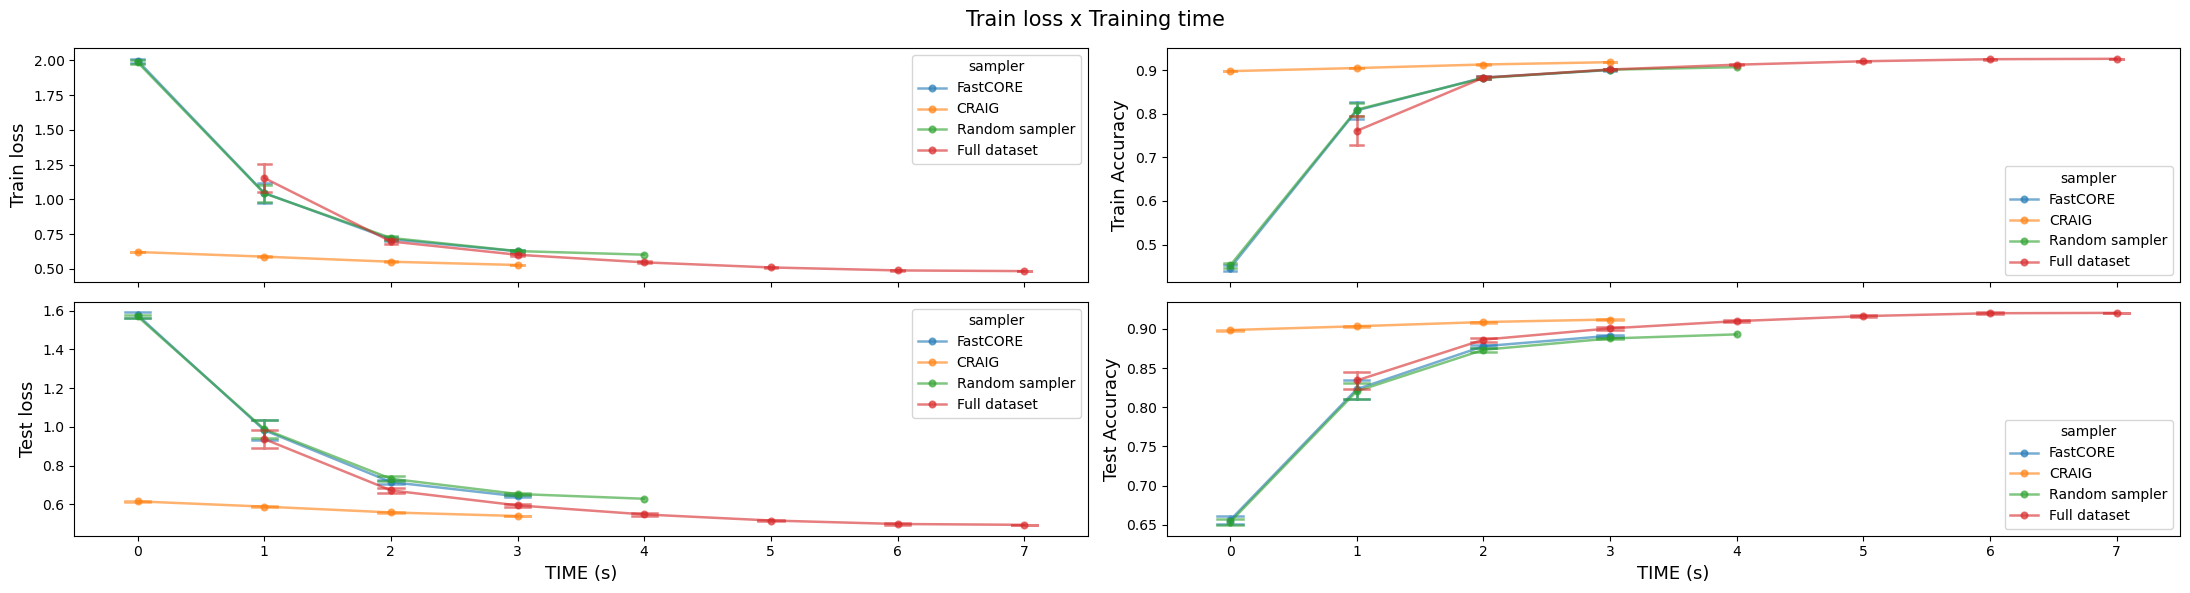

In [11]:
result = pd.read_csv('/Users/victor/Documents/projects/coreset/results/mnist/curve_mnist.csv', index_col='Unnamed: 0')
result['elapsed'] = result['elapsed'].astype(int)

fig, ax = plt.subplots(2,2, figsize=(22,6), sharex=True)
fig.suptitle('Train loss x Training time', fontsize=15)

# sns.lineplot(result, x='elapsed', ax=ax[0],y='loss', hue='sampler', style='sampler', errorbar=('sd'), markers=True, err_style='bars', lw=1.8)
sns.pointplot(result, x='elapsed', ax=ax[0, 0],y='loss', hue='sampler', errorbar=('sd', .3), lw=1.8, capsize=.1, alpha=.6)
ax[0,0].set_xlabel('TIME (s)', fontsize=13)
ax[0,0].set_ylabel('Train loss', fontsize=13)
ax[0,0].set_xlim([-.10, 12])

sns.pointplot(result, x='elapsed', ax=ax[0,1],y='accuracy', hue='sampler', errorbar=('sd', .3), lw=1.8, capsize=.1, alpha=.6)
ax[0,1].set_xlabel('TIME (s)', fontsize=13)
ax[0,1].set_ylabel('Train Accuracy', fontsize=13)

sns.pointplot(result, x='elapsed', ax=ax[1, 0],y='val_loss', hue='sampler', errorbar=('sd', .3), lw=1.8, capsize=.2, alpha=.6)
ax[1,0].set_xlabel('TIME (s)', fontsize=13)
ax[1,0].set_ylabel('Test loss', fontsize=13)
ax[1,0].set_xlim([-.10, 12])

sns.pointplot(result, x='elapsed', ax=ax[1,1],y='val_accuracy', hue='sampler', errorbar=('sd', .3), lw=1.8, capsize=.2, alpha=.6)
ax[1,1].set_xlabel('TIME (s)', fontsize=13)
ax[1,1].set_ylabel('Test Accuracy', fontsize=13)

plt.tight_layout()
plt.show()

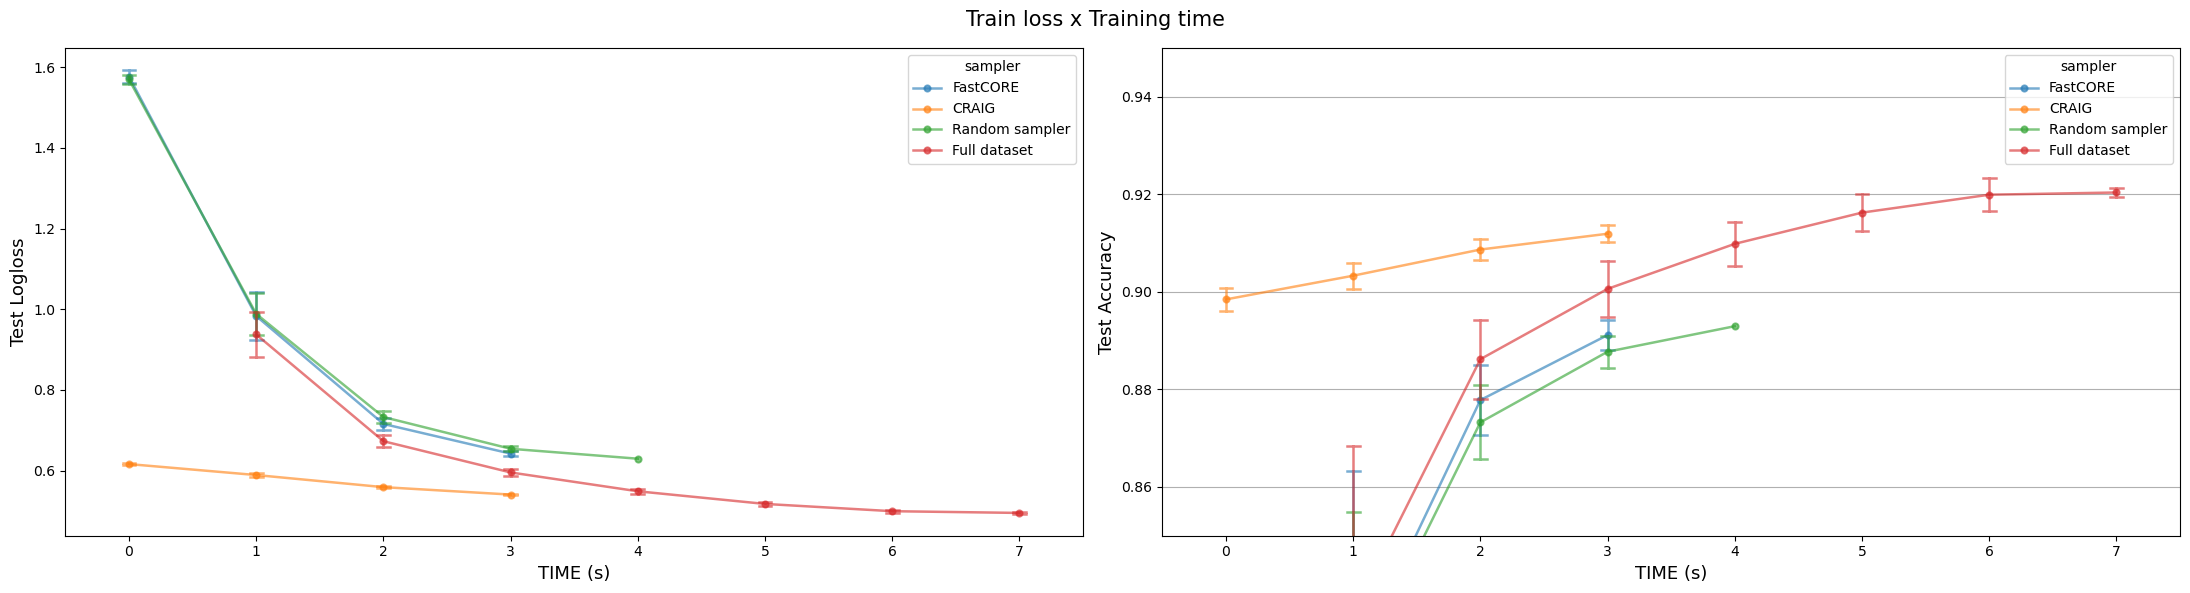

In [12]:
result = pd.read_csv('/Users/victor/Documents/projects/coreset/results/mnist/curve_mnist.csv', index_col='Unnamed: 0')
result['elapsed'] = result['elapsed'].astype(int)

fig, ax = plt.subplots(1,2, figsize=(22,6), sharex=True)
fig.suptitle('Train loss x Training time', fontsize=15)

# sns.lineplot(result, x='elapsed', ax=ax[0],y='loss', hue='sampler', style='sampler', errorbar=('sd'), markers=True, err_style='bars', lw=1.8)
sns.pointplot(result, x='elapsed', ax=ax[0],y='val_loss', hue='sampler', errorbar=('sd', .35), lw=1.8, capsize=.1, alpha=.6)
ax[0].set_xlabel('TIME (s)', fontsize=13)
ax[0].set_ylabel('Test Logloss', fontsize=13)
ax[0].set_xlim([-.10, 12])

sns.pointplot(result, x='elapsed', ax=ax[1],y='val_accuracy', hue='sampler', errorbar=('sd'), lw=1.8, capsize=.1, alpha=.6)
ax[1].set_xlabel('TIME (s)', fontsize=13)
ax[1].set_ylabel('Test Accuracy', fontsize=13)
ax[1].set_ylim([.85, .95])
ax[1].grid(axis='y')
plt.tight_layout()
plt.show()

[PosixPath('sgemm_performance/b_size_sgemm_performance.csv'), PosixPath('drugs_review/b_size_drug_reviews.csv')]
B_SIZE_DRUG_REVIEWS


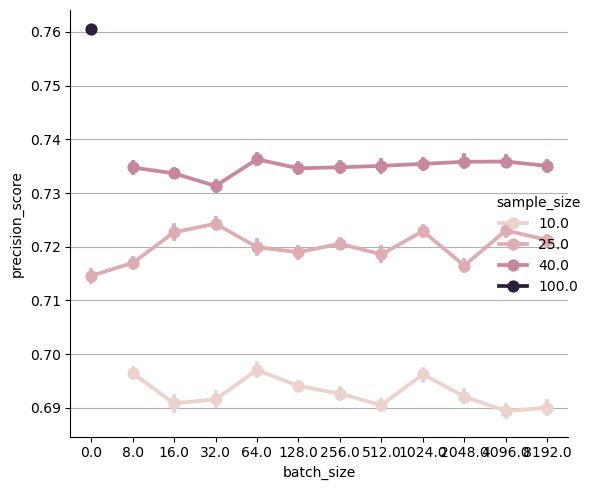

In [13]:
curdir = Path()
files = [*curdir.rglob('b_size*.csv')]

print(files)


print(f'{files[1].stem.upper()}')


result = pd.read_csv(files[1])

result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
result = result.fillna(0)
# result['alpha'] = result.alpha.round(0)

result = result[result.metric=='precision_score']
sns.catplot(data=result, x='batch_size', y='value', hue='sample_size', kind='point')
# plt.yscale('log')
plt.ylabel(result.metric.unique()[0])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

[PosixPath('sgemm_performance/b_size_sgemm_performance.csv'), PosixPath('drugs_review/b_size_drug_reviews.csv')]
B_SIZE_SGEMM_PERFORMANCE


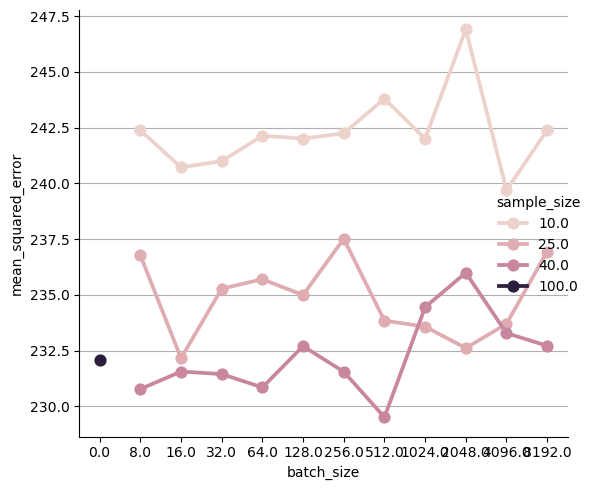

In [14]:
curdir = Path()
files = [*curdir.rglob('b_size*.csv')]

print(files)


print(f'{files[0].stem.upper()}')


result = pd.read_csv(files[0])

result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100

result = result.fillna(0)

result['value'] = result['value'] ** .5
result = result[result.metric=='mean_squared_error']
sns.catplot(data=result, x='batch_size', y='value', hue='sample_size', kind='point')

plt.ylabel(result.metric.unique()[-1])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [15]:
result.sample_size.unique()

array([100.,  10.,  25.,  40.])